In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import category_encoders as ce

from os.path import join
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Concatenate, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model

In [2]:
raw_data_train = pd.read_csv('meat_train_data.csv')
raw_data_test = pd.read_csv('meat_test_data.csv')

In [3]:
raw_data_train

,Unnamed: 0,level_0,DateTimeRecorded,PlantID,ProductID,Weight,TotEOLWeightSpec1,EOLBatchStart,filename_x,filename_y
0,2,2,7/17/17 8:06,202.0,20004,1.18,25.185,6.366750e+10,camera-screenshot202200041500275215.png,background1500275180.601.png
1,3,3,7/17/17 8:07,202.0,20003,4.48,19.364,6.366750e+10,camera-screenshot202200031500275226.png,background1500275180.601.png
2,4,4,7/17/17 8:07,202.0,20004,1.08,36.614,6.366750e+10,camera-screenshot202200041500275242.png,background1500275180.601.png
3,5,5,7/17/17 8:07,202.0,20003,3.82,28.046,6.366750e+10,camera-screenshot202200031500275247.png,background1500275180.601.png
4,6,6,7/17/17 8:08,202.0,20004,1.08,48.043,6.366750e+10,camera-screenshot202200041500275315.png,background1500275357.372.png
...,...,...,...,...,...,...,...,...,...,...
6927,8664,8664,NaN,NaN,20002,7.42,NaN,NaN,augmented_image_93.png,NaN
6928,8665,8665,NaN,NaN,20002,10.80,NaN,NaN,augmented_image_94.png,NaN
6929,8666,8666,NaN,NaN,20002,8.96,NaN,NaN,augmented_image_95.png,NaN
6930,8668,8668,NaN,NaN,20002,8.58,NaN,NaN,augmented_image_97.png,NaN


In [4]:
raw_copy_train = raw_data_train[["ProductID","filename_x"]]
raw_copy_test = raw_data_test[["ProductID","filename_x"]]

In [5]:
product_names_train = raw_copy_train["filename_x"].unique()
product_names_train

array(['camera-screenshot202200041500275215.png',
       'camera-screenshot202200031500275226.png',
       'camera-screenshot202200041500275242.png', ...,
       'augmented_image_95.png', 'augmented_image_97.png',
       'augmented_image_98.png'], dtype=object)

In [6]:
product_names_test = raw_copy_test["filename_x"].unique()
product_names_test

array(['camera-screenshot202200041500275178.png',
       'camera-screenshot202200031500275183.png',
       'camera-screenshot202200041500275343.png', ...,
       'augmented_image_92.png', 'augmented_image_96.png',
       'augmented_image_99.png'], dtype=object)

In [7]:
products_train = raw_copy_train["ProductID"]
encoder=ce.OneHotEncoder(cols='ProductID',handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [8]:
products_train.value_counts()

20010    2289
20003    1825
20004    1793
20001     905
20002     120
Name: ProductID, dtype: int64

In [9]:
train_encoded = encoder.fit_transform(products_train)
train_encoded

C:\Users\Lenovo\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ProductID_20004.0,ProductID_20003.0,ProductID_20002.0,ProductID_20001.0,ProductID_20010.0
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6927,0.0,0.0,1.0,0.0,0.0
6928,0.0,0.0,1.0,0.0,0.0
6929,0.0,0.0,1.0,0.0,0.0
6930,0.0,0.0,1.0,0.0,0.0


In [10]:
products_test = raw_copy_test["ProductID"]
encoder=ce.OneHotEncoder(cols='ProductID',handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [11]:
products_test.value_counts()

20010    574
20003    458
20004    448
20001    228
20002     31
Name: ProductID, dtype: int64

In [12]:
test_encoded = encoder.fit_transform(products_test)
test_encoded

C:\Users\Lenovo\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ProductID_20004.0,ProductID_20003.0,ProductID_20002.0,ProductID_20001.0,ProductID_20010.0
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1734,0.0,0.0,1.0,0.0,0.0
1735,0.0,0.0,1.0,0.0,0.0
1736,0.0,0.0,1.0,0.0,0.0
1737,0.0,0.0,1.0,0.0,0.0


In [13]:
train_weights = raw_data_train[["Weight","ProductID","level_0"]]

In [14]:
train_weights_sorted = train_weights.pivot(index='level_0',columns = 'ProductID', values='Weight')

In [15]:
weights_train = train_weights_sorted.fillna(0)

In [16]:
weights_train

ProductID,20001,20002,20003,20004,20010
level_0,,,,,
2,0.0,0.00,0.00,1.18,0.0
3,0.0,0.00,4.48,0.00,0.0
4,0.0,0.00,0.00,1.08,0.0
5,0.0,0.00,3.82,0.00,0.0
6,0.0,0.00,0.00,1.08,0.0
...,...,...,...,...,...
8664,0.0,7.42,0.00,0.00,0.0
8665,0.0,10.80,0.00,0.00,0.0
8666,0.0,8.96,0.00,0.00,0.0


In [17]:
test_weights = raw_data_test[["Weight","ProductID","level_0"]]

In [18]:
test_weights_sorted = test_weights.pivot(index='level_0',columns = 'ProductID', values='Weight')

In [19]:
weights_test = test_weights_sorted.fillna(0)
weights_test

ProductID,20001,20002,20003,20004,20010
level_0,,,,,
0,0.0,0.00,0.00,1.20,0.0
1,0.0,0.00,4.04,0.00,0.0
8,0.0,0.00,0.00,1.44,0.0
9,0.0,0.00,4.70,0.00,0.0
22,0.0,0.00,0.00,1.06,0.0
...,...,...,...,...,...
8651,0.0,10.80,0.00,0.00,0.0
8656,0.0,8.30,0.00,0.00,0.0
8663,0.0,8.80,0.00,0.00,0.0


In [20]:
def read_img(img_id, train, size):
   
    img = image.load_img(join("OneDrive/output_datasets/shrink_train_test_data" , train, '%s' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [21]:
IMG_SIZE = 112

X_all = np.zeros((len(raw_copy_train), IMG_SIZE, IMG_SIZE, 3), dtype='float32')
Y_all = label_binarize(raw_copy_train["ProductID"], classes = product_names_train)

for i in tqdm(range(len(raw_copy_train))):
    img = read_img(raw_copy_train['filename_x'][i],'train', (IMG_SIZE, IMG_SIZE))
    x = np.expand_dims(img.copy(), axis=0)
    X_all[i] = x / 255.0
    
print('Training Images Shape: {} size: {:,}'.format(X_all.shape, X_all.size))

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 6932/6932 [00:05<00:00, 1169.73it/s]

Training Images Shape: (6932, 112, 112, 3) size: 260,865,024


In [22]:
def read_img(img_id, test, size):
   
    img = image.load_img(join("OneDrive/output_datasets/shrink_train_test_data" , test, '%s' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [23]:
IMG_SIZE = 112

A_all = np.zeros((len(raw_copy_test), IMG_SIZE, IMG_SIZE, 3), dtype='float32')
B_all = label_binarize(raw_copy_test["ProductID"], classes = product_names_test)

for i in tqdm(range(len(raw_copy_test))):
    img = read_img(raw_copy_test['filename_x'][i],'test', (IMG_SIZE, IMG_SIZE))
    a = np.expand_dims(img.copy(), axis=0)
    A_all[i] = a / 255.0
    
print('Test Images Shape: {} size: {:,}'.format(A_all.shape, A_all.size))

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 1739/1739 [00:01<00:00, 1179.60it/s]

Test Images Shape: (1739, 112, 112, 3) size: 65,442,048


Training data shape :  (6932, 112, 112, 3) (6932,)
Total number of outputs :  5
Output classes :  [20001 20002 20003 20004 20010]


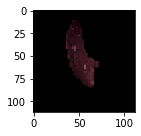

In [24]:
print('Training data shape : ', X_all.shape,products_train.shape)


# Find the unique numbers from the train labels
classes = np.unique(products_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_all[0,:,:], cmap='gray')



Test data shape :  (1739, 112, 112, 3) (1739,)
Total number of outputs :  5
Output classes :  [20001 20002 20003 20004 20010]


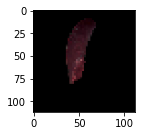

In [25]:
print('Test data shape : ', A_all.shape,products_test.shape)


# Find the unique numbers from the train labels
classes = np.unique(products_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(A_all[0,:,:], cmap='gray')


In [26]:
X_all.shape

(6932, 112, 112, 3)

In [27]:
A_all.shape

(1739, 112, 112, 3)

In [28]:
train_encoded.shape

(6932, 5)

In [29]:
test_encoded.shape

(1739, 5)

In [30]:
weights_train.shape

(6932, 5)

In [31]:
weights_test.shape

(1739, 5)

In [32]:
first_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
conv11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
conv12 = Conv2D(32, (3, 3), activation='relu')(conv11)
pool13 = MaxPooling2D(pool_size=(2, 2))(conv12)
dropout14 = Dropout(0.25)(pool13)
conv15 = Conv2D(64, (3, 3), padding='same', activation='relu')(dropout14)
conv16 = Conv2D(64, (3, 3), activation='relu')(conv15)
pool17 = MaxPooling2D(pool_size=(2, 2))(conv16)
dropout18 = Dropout(0.25)(pool17)
conv19 = Conv2D(64, (3, 3), padding='same', activation='relu')(dropout18)
conv110 = Conv2D(64, (3, 3), activation='relu')(conv19)
pool111 = MaxPooling2D(pool_size=(2, 2))(conv110)
dropout112 = Dropout(0.25)(pool111)
flatten113 = Flatten()(dropout112)
dense114 = Dense(512, activation='relu')(flatten113)
dense115 = Dense(nClasses, activation='sigmoid')(dense114)

second_input = Input(shape=(5))

merge = concatenate([dense115, second_input])
dense117 = Dense(nClasses, activation='sigmoid')(merge)
model = Model(inputs=[first_input, second_input], outputs=dense117)

In [37]:
model.summary()
batch_size = 256
epochs = 20
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='convolutional_neural_network.png')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 110, 110, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 55, 55, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [38]:
CNN_model = model.fit([X_all, train_encoded], weights_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=([A_all,test_encoded], weights_test))

Epoch 1/20
28/28 [==============================] - 169s 6s/step - loss: -0.0790 - accuracy: 0.3634 - val_loss: -0.1073 - val_accuracy: 0.4330
Epoch 2/20
28/28 [==============================] - 165s 6s/step - loss: -0.2410 - accuracy: 0.4681 - val_loss: -0.3144 - val_accuracy: 0.4888
Epoch 3/20
28/28 [==============================] - 168s 6s/step - loss: -0.3704 - accuracy: 0.4866 - val_loss: -0.4557 - val_accuracy: 0.6952
Epoch 4/20
28/28 [==============================] - 172s 6s/step - loss: -0.4839 - accuracy: 0.7116 - val_loss: -0.5548 - val_accuracy: 0.7021
Epoch 5/20
28/28 [==============================] - 167s 6s/step - loss: -0.5968 - accuracy: 0.7157 - val_loss: -0.6489 - val_accuracy: 0.7154
Epoch 6/20
28/28 [==============================] - 169s 6s/step - loss: -0.6753 - accuracy: 0.7224 - val_loss: -0.7432 - val_accuracy: 0.7234
Epoch 7/20
28/28 [==============================] - 170s 6s/step - loss: -0.7697 - accuracy: 0.7291 - val_loss: -0.8357 - val_accuracy: 0.7177

In [43]:
y_pred = model.evaluate([A_all, test_encoded],weights_test)

55/55 [==============================] - 9s 167ms/step - loss: -2.0027 - accuracy: 0.9701
